In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data =data.drop('Id',axis='columns')

In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
map_dic={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}              

In [8]:
data['Species']=data['Species'].map(map_dic)

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data_cols =data.columns
data_cols

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

/home/deslin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


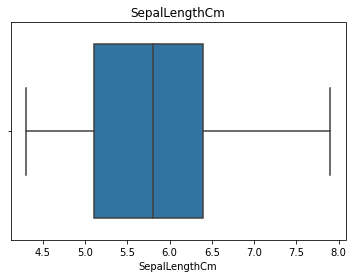

/home/deslin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


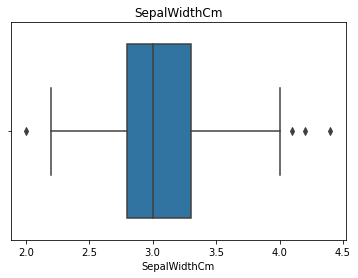

/home/deslin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


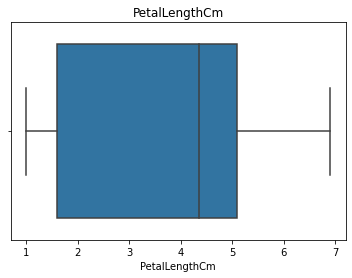

/home/deslin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


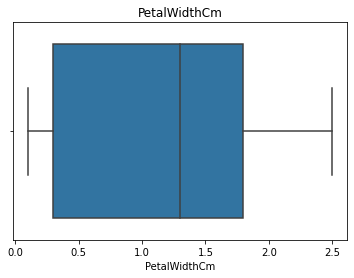

/home/deslin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


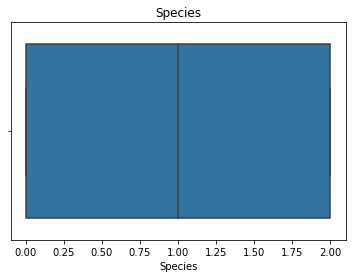

In [20]:

for x in data_cols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [26]:
#removing outlier values
desc = data['SepalWidthCm'].describe()
IQR =desc['75%']-desc['25%']
upper_limit=desc['75%']+1.5*IQR
lower_limit=desc['25%']-1.5*IQR
data['SepalWidthCm'][data['SepalWidthCm']> upper_limit] =upper_limit
data['SepalWidthCm'][data['SepalWidthCm']< lower_limit]=lower_limit


<ipython-input-26-2fa11f8041de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SepalWidthCm'][data['SepalWidthCm']> upper_limit] =upper_limit
<ipython-input-26-2fa11f8041de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SepalWidthCm'][data['SepalWidthCm']< lower_limit]=lower_limit


/home/deslin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

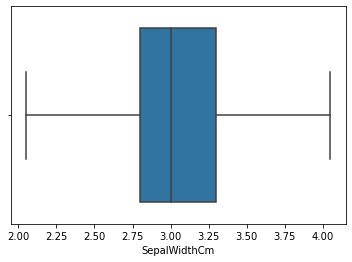

In [28]:
sns.boxplot(data['SepalWidthCm'],orient='h')

In [30]:
y=data['Species']
x=data.drop('Species',axis='columns')

In [31]:
#data Spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33,random_state=45)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
classifier = LogisticRegression()

In [36]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=classifier.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 15]])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.96

In [41]:
classifier.score(x_train,y_train)

0.96

In [42]:
classifier.score(x_test,y_test)

0.96